# Importing Libraries

In [1]:
import sys, gc

sys.path.append('..')

from scripts.fine_tuning.train_model import train_model, validate_model
from scripts.fine_tuning.infer_model import gen_clf_report

from utils.utils import *

# Evaluation

## Pre-Trained Models

In [2]:
datasets = ["imdb", "spotify", "news"]

labels = [2, 5, 5]

Running evaluation pipeline for imdb dataset


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading pre-trained model...


c:\Users\91939\.conda\envs\base_env\Lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Validation Loss: 0.7507, Validation Accuracy: 0.5400


C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

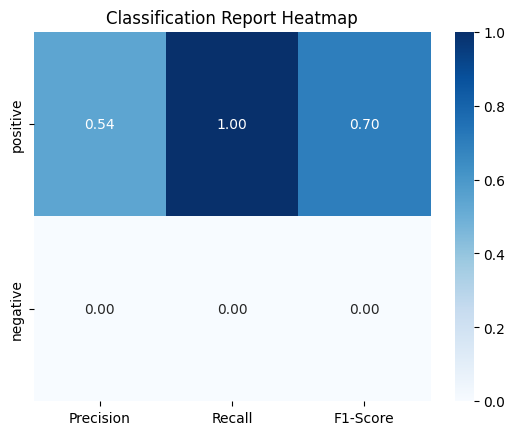

              precision    recall  f1-score   support

    positive       0.54      1.00      0.70        54
    negative       0.00      0.00      0.00        46

    accuracy                           0.54       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.29      0.54      0.38       100

Finished evaluation pipeline for imdb dataset


Running evaluation pipeline for spotify dataset


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading pre-trained model...
Validation Loss: 1.6910, Validation Accuracy: 0.1233


C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

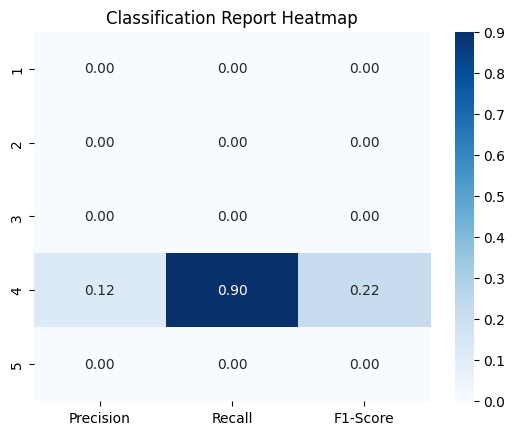

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        15
           4       0.12      0.90      0.22        10
           5       0.00      0.00      0.00        13

    accuracy                           0.12        73
   macro avg       0.03      0.18      0.04        73
weighted avg       0.02      0.12      0.03        73

Finished evaluation pipeline for spotify dataset


Running evaluation pipeline for news dataset


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading pre-trained model...
Validation Loss: 1.7239, Validation Accuracy: 0.1200


C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

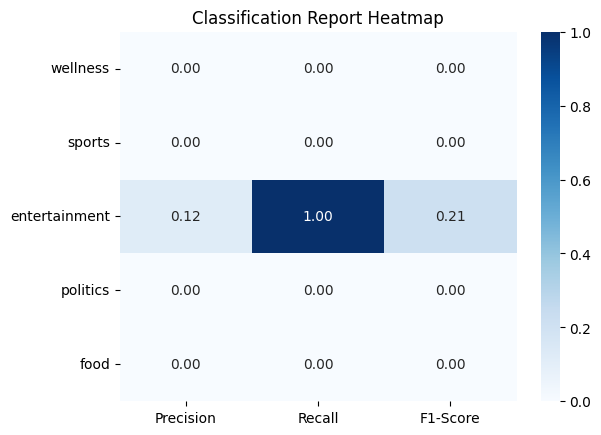

               precision    recall  f1-score   support

     wellness       0.00      0.00      0.00        10
       sports       0.00      0.00      0.00         6
entertainment       0.12      1.00      0.21         6
     politics       0.00      0.00      0.00        16
         food       0.00      0.00      0.00        12

     accuracy                           0.12        50
    macro avg       0.02      0.20      0.04        50
 weighted avg       0.01      0.12      0.03        50

Finished evaluation pipeline for news dataset




In [3]:
for dataset, num_labels in zip(datasets, labels):
    
    print(f"Running evaluation pipeline for {dataset} dataset")

    # Initialize the pre-trained model

    model_pt, tokenizer_pt = load_model_tok(dataset_name=dataset, model_name="bert-base-uncased",
                                            ft=False, num_labels=num_labels)
    
    # Load and preprocess the data

    train_loader, val_loader = load_and_preprocess_data(dataset_name=dataset, tokenizer=tokenizer_pt)

    # Validate the model

    loss, accuracy = validate_model(model_pt, val_loader)

    # Generate classification report

    report = gen_clf_report(model_pt, val_loader, dataset, "bert-base-uncased")

    print(report)

    print(f"Finished evaluation pipeline for {dataset} dataset")

    print(f"\n{'='*50}\n")

## Fine-Tuned Models

Running evaluation pipeline for imdb dataset


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading fine-tuned model...
Validation Loss: 0.1877, Validation Accuracy: 0.9300
Validation Loss: 0.1877, Validation Accuracy: 0.9300


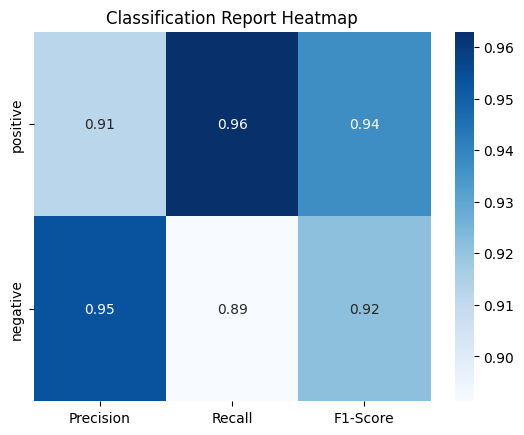

              precision    recall  f1-score   support

    positive       0.91      0.96      0.94        54
    negative       0.95      0.89      0.92        46

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Finished evaluation pipeline for imdb dataset


Running evaluation pipeline for spotify dataset


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading fine-tuned model...
Validation Loss: 0.8637, Validation Accuracy: 0.5753
Validation Loss: 0.8637, Validation Accuracy: 0.5753


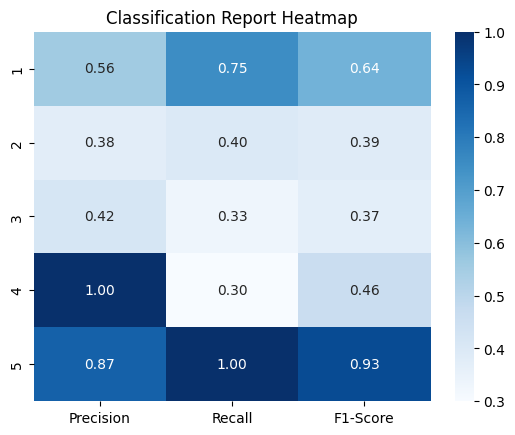

              precision    recall  f1-score   support

           1       0.56      0.75      0.64        20
           2       0.38      0.40      0.39        15
           3       0.42      0.33      0.37        15
           4       1.00      0.30      0.46        10
           5       0.87      1.00      0.93        13

    accuracy                           0.58        73
   macro avg       0.64      0.56      0.56        73
weighted avg       0.61      0.58      0.56        73

Finished evaluation pipeline for spotify dataset


Running evaluation pipeline for news dataset


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading fine-tuned model...
Validation Loss: 0.9394, Validation Accuracy: 0.9200
Validation Loss: 0.9394, Validation Accuracy: 0.9200


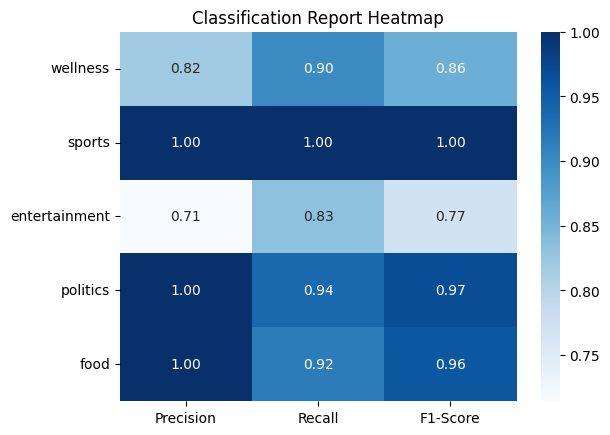

               precision    recall  f1-score   support

     wellness       0.82      0.90      0.86        10
       sports       1.00      1.00      1.00         6
entertainment       0.71      0.83      0.77         6
     politics       1.00      0.94      0.97        16
         food       1.00      0.92      0.96        12

     accuracy                           0.92        50
    macro avg       0.91      0.92      0.91        50
 weighted avg       0.93      0.92      0.92        50

Finished evaluation pipeline for news dataset




In [4]:
for dataset, num_labels in zip(datasets, labels):
    
    print(f"Running evaluation pipeline for {dataset} dataset")

    # Initialize the fine-tuned model

    model_pt, tokenizer_pt = load_model_tok(dataset_name=dataset, model_name="bert-base-uncased",
                                            ft=True, num_labels=num_labels)
    
    # Load and preprocess the data

    train_loader, val_loader = load_and_preprocess_data(dataset_name=dataset, tokenizer=tokenizer_pt)

    # Validate the model

    loss, accuracy = validate_model(model_pt, val_loader)

    print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

    # Generate classification report

    report = gen_clf_report(model_pt, val_loader, dataset, "bert-base-uncased")

    print(report)

    print(f"Finished evaluation pipeline for {dataset} dataset")

    print(f"\n{'='*50}\n")

# Training

In [ ]:
datasets = ["imdb", "spotify", "news"]

labels = [2, 5, 5]

sel_idx = 0

dataset_name, num_labels = datasets[sel_idx], labels[sel_idx]

model_name = "bert-base-uncased"

In [ ]:
# Initialize base model and tokenizer

model, tokenizer = load_model_tok(dataset_name=dataset_name, model_name=model_name, ft=False, num_labels=num_labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading pre-trained model...


In [3]:
# Load and preprocess the data

train_loader, val_loader = load_and_preprocess_data(dataset_name=dataset_name, tokenizer=tokenizer)

In [5]:
# Train the model

train_model(model, train_loader, val_loader, dataset_name, model_name)

In [7]:
torch.cuda.empty_cache()

gc.collect()

814